http://cs229.stanford.edu/ps/ps1/ps1.pdf

# (a)

Use $(k)$ instead of $(i)$ for indexing data point to avoid confusion later, and use $i$ and $j$ to index the dimensions of $x$. Suppose the $x^{(k)}$ is a $n$-dimension vector.

\begin{align*}
J(\theta) &= \frac{1}{m} \sum_{k=1}^{m} \mathrm{log}(1 + e ^{-y^{(k)} \theta^T x^{(k)})} \\
               &= - \frac{1}{m} \sum_{k=1}^{m} \mathrm{log}(g(z^{(k)}))
\end{align*}

where $g(z^{(k)}) = \frac{1}{1 + e^{-z^{(k)}}}$ and $z^{(k)} = y^{(k)} \theta^T x^{(k)}$. For clarity, in the following derivation, $z = z^{(k)}$.

Note that

\begin{align*}
\frac{\partial g}{\partial z} =\frac{\partial \frac{1}{1 + e^{-z}}}{\partial z}  
                              =\frac{0 - 1 \times \frac{\partial (1 + e^{-z})}{\partial z}}{(1 + e^{-z})^2} 
                              =\frac{e^{-z}}{(1 + e^{-z})^2} 
                              =\frac{1}{1 + e^{-z}} \cdot \frac{e^{-z}}{1 + e^{-z}}
                              =g(1 - g)
\end{align*}

and similarly (unnecessary for this problem, just put here for reference),

\begin{align*}
\frac{\partial (1 - g)}{\partial z} 
= \frac{\partial \frac{e^{-z}}{1 + e^{-z}}}{\partial z}
= - \frac{\partial g}{\partial z} = g(g - 1)
\end{align*}

So

\begin{align*}
\frac{\partial J}{\partial \theta_i} 
 &= -\frac{1}{m} \sum_{k=1}^{m} \frac{1}{g(z)} \frac{\partial g(z)}{\partial z} \frac{\partial z(\theta_i)}{\partial \theta_i}  \\
 &= -\frac{1}{m} \sum_{k=1}^{m} \frac{1}{g(z)} g(z) (1 - g(z)) \frac{\partial z}{\partial \theta_i}  \\
 &= -\frac{1}{m} \sum_{k=1}^{m} (1 - g(z)) \frac{\partial z}{\partial \theta_i}  \\
 &= -\frac{1}{m} \sum_{k=1}^{m} (1 - g(z)) y^{(k)} x_i^{(k)}  \\
 &= \frac{1}{m} \sum_{k=1}^{m} (g(z) - 1) y^{(k)} x_i^{(k)}  \\
\end{align*}


Then,

\begin{align*}
H_{ij} = \frac{\partial J}{\partial \theta_i \partial \theta_j} 
&= \frac{1}{m} \sum_{k=1}^{m} \frac{\partial (g(z)  - 1)}{\partial \theta_j} y^{(k)} x_i^{(k)} \\
&= \frac{1}{m} \sum_{k=1}^{m} \frac {\partial g(z)}{\partial \theta_j} y^{(k)} x_i^{(k)} \\
&= \frac{1}{m} \sum_{k=1}^{m} g(z)(1 - g(z)) \frac{\partial z}{\partial \theta_j} y^{(k)} x_i^{(k)} \\
&= \frac{1}{m} \sum_{k=1}^{m} g(z)(1 - g(z)) y^{(k)} x_j^{(k)} y^{(k)} x_i^{(k)} \\
&= \frac{1}{m} \sum_{k=1}^{m} g(z)(1 - g(z)) x_i^{(k)} x_j^{(k)} \\
\end{align*}

Lastly,

\begin{align*}
z^THz &= \sum_{i=1}^{n} \sum_{j=1}^{n} z_i H_{ij} z_j \\
           &= \sum_{i=1}^{n} \sum_{j=1}^{n} [z_i \frac{1}{m} \sum_{k=1}^{m} g(z)(1 - g(z)) x_i^{(k)} x_j^{(k)}] z_j \\
           &= \frac{1}{m} \sum_{k=1}^{m} g(z)(1 - g(z)) \sum_{i=1}^{n} \sum_{j=1}^{n} z_i x_i^{(k)} x_j^{(k)} z_j
\end{align*}

Given that $1 > g(z) > 0$ and $\sum_{i=1}^{n} \sum_{j=1}^{n} z_i x_i^{(k)} x_j^{(k)} z_j = ((x^{(k)})^T z)^2 \ge 0$, 

$z^T H z \ge 0$, so $H$ is PSD, i.e. $H \succeq 0$. 

Hence, $J$ is convex and it has no local minima.

# (b) Implement Newton's method for logistic regression

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
df_X = pd.read_csv('http://cs229.stanford.edu/ps/ps1/logistic_x.txt', sep='\ +', header=None, engine='python')
ys = pd.read_csv('http://cs229.stanford.edu/ps/ps1/logistic_y.txt', sep='\ +', header=None, engine='python')
ys = ys.astype(int)

In [3]:
df_X['label'] = ys[0].values

Quick look at the data

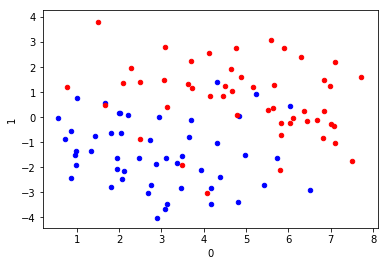

In [4]:
ax = plt.axes()

df_X.query('label == -1').plot.scatter(x=0, y=1, ax=ax, color='blue')
df_X.query('label == 1').plot.scatter(x=0, y=1, ax=ax, color='red')

Newton's method addresses getting to $f(\theta) = 0$, and minimizing $J(\theta)$ means getting $\frac{\partial J}{\partial \theta}$ to 0. There after applying Newton's method, extending it to multidimensional setting (Newton-Raphson method), the update rule becomes:

\begin{align*}
\theta &:= \theta - \frac{\partial J(\theta) / \partial \theta} {H} \\
       &:= \theta - \frac{\nabla_{\theta} J(\theta)} {H} \\
       &:= \theta - H^{-1} \nabla_{\theta} J(\theta)
\end{align*}

Note, the $H$ in the denominator may not be a valid mathematical expression as it is actually an inverse operation.

In [5]:
Xs = df_X[[0, 1]].values

In [6]:
Xs.shape

(99, 2)

In [7]:
# adding a columns of ones for the intercept terms, and also use column vectors
Xs = np.hstack([np.ones((Xs.shape[0], 1)), Xs])
ys = df_X['label'].values

Copied equations from above:

$$z^{(k)} = y^{(k)} \theta^T x^{(k)}$$

$$g(z^{(k)}) = \frac{1}{1 + e^{-z^{(k)}}}$$

$$
\frac{\partial J}{\partial \theta_i} 
 = \frac{1}{m} \sum_{k=1}^{m} (g(z^{(k)}) - 1) y^{(k)} x_i^{(k)}
$$

$$
H_{ij} = \frac{1}{m} \sum_{k=1}^{m} g(z^{(k)})(1 - g(z^{(k)})) x_i^{(k)} x_j^{(k)}
$$

In [15]:
all_thetas = [] # collect for demonstration purpose
theta = np.zeros(Xs.shape[1])
tol = 1e9
n_iters = 0
while tol > 1e-6:
    zs = ys * Xs.dot(theta)
    gzs = 1 / (1 + np.exp(-zs))
    nabla = np.mean((gzs - 1) * ys * Xs.T, axis=1)
    
    # Refactor, more efficient way of calculating hessian
    hessian = np.zeros((Xs.shape[1], Xs.shape[1]))
    for i in range(hessian.shape[0]):
        for j in range(hessian.shape[0]):
            if i <= j:
                hessian[i][j] = np.mean(gzs * (1 - gzs) * Xs[:,i] * Xs[:,j])
                if i != j:
                    hessian[j][i] = hessian[i][j]
            
    delta = np.linalg.inv(hessian).dot(nabla)
    old_theta = theta.copy()
    theta -= delta
    all_thetas.append(theta.copy())
    n_iters += 1
    tol = np.sum(np.abs(theta - old_theta))
    #import pdb; pdb.set_trace()
print('converged after {0} iterations'.format(n_iters))

converged after 7 iterations


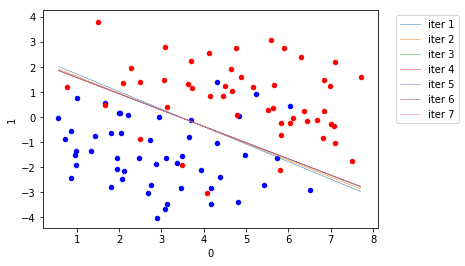

In [9]:
ax = plt.axes()

df_X.query('label == -1').plot.scatter(x=0, y=1, ax=ax, color='blue')
df_X.query('label == 1').plot.scatter(x=0, y=1, ax=ax, color='red')

_xs = np.array([np.min(Xs[:,1]), np.max(Xs[:,1])])
for k, theta in enumerate(all_thetas):
    _ys = (theta[0] + theta[1] * _xs) / (- theta[2])
    plt.plot(_xs, _ys, label='iter {0}'.format(k + 1), lw=0.5)
plt.legend(bbox_to_anchor=(1.04,1), loc="upper left")

Since all the lines are so close to each other, Newton's method converges very quickly, at least for this dataset.